(-40, 40)

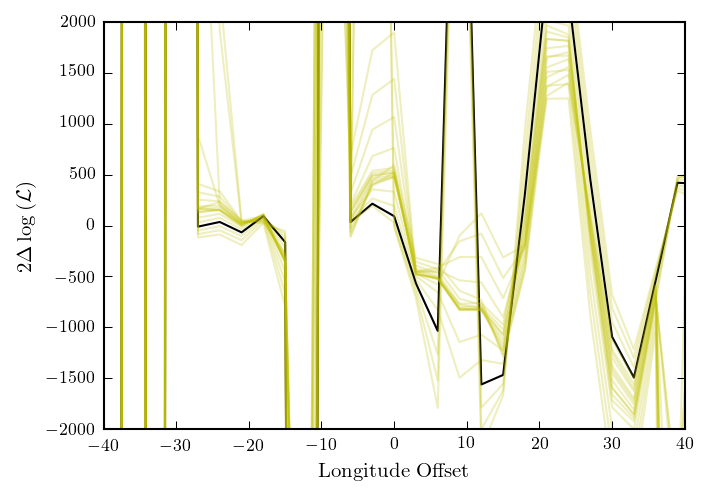

In [1]:
import h5py

best_fit = 7

for i in range(0,20):
    
    h5 = h5py.File('../mod_c/mod_k_'+str(i)+'_XCO_stripped.hdf5', 'r')
#     for f in h5['/fit_results']:
#          print f

    #ll =  h5['/fit_results/scan_longitude/'].attrs['loglike_total']

    ll =  h5['/fit_results/scan_longitude/'].attrs['TS']
    lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']

    if i == best_fit:
        #plt.plot(lons,2*(ll-min(ll)), c='k', alpha=1)
        plt.plot(lons,ll, c='k', alpha=1)
    else:
        #plt.plot(lons,2*(ll-min(ll)), c='y', alpha=.25)
        plt.plot(lons,ll, c='y', alpha=.25)
    
    try:    
        ll =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
        lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']

        if i == best_fit:
            plt.plot(lons,2*(ll-min(ll)), c='k', alpha=1)
        else:
            plt.plot(lons,2*(ll-min(ll)), c='y', alpha=.25)
        
        
        
    except:
        pass
    

plt.ylabel(r'$2\Delta\log{(\mathcal{L})}$')
plt.xlabel(r'Longitude Offset')
plt.ylim(-2e3,2e3)
#plt.yscale('log')
plt.xlim(-40,40)

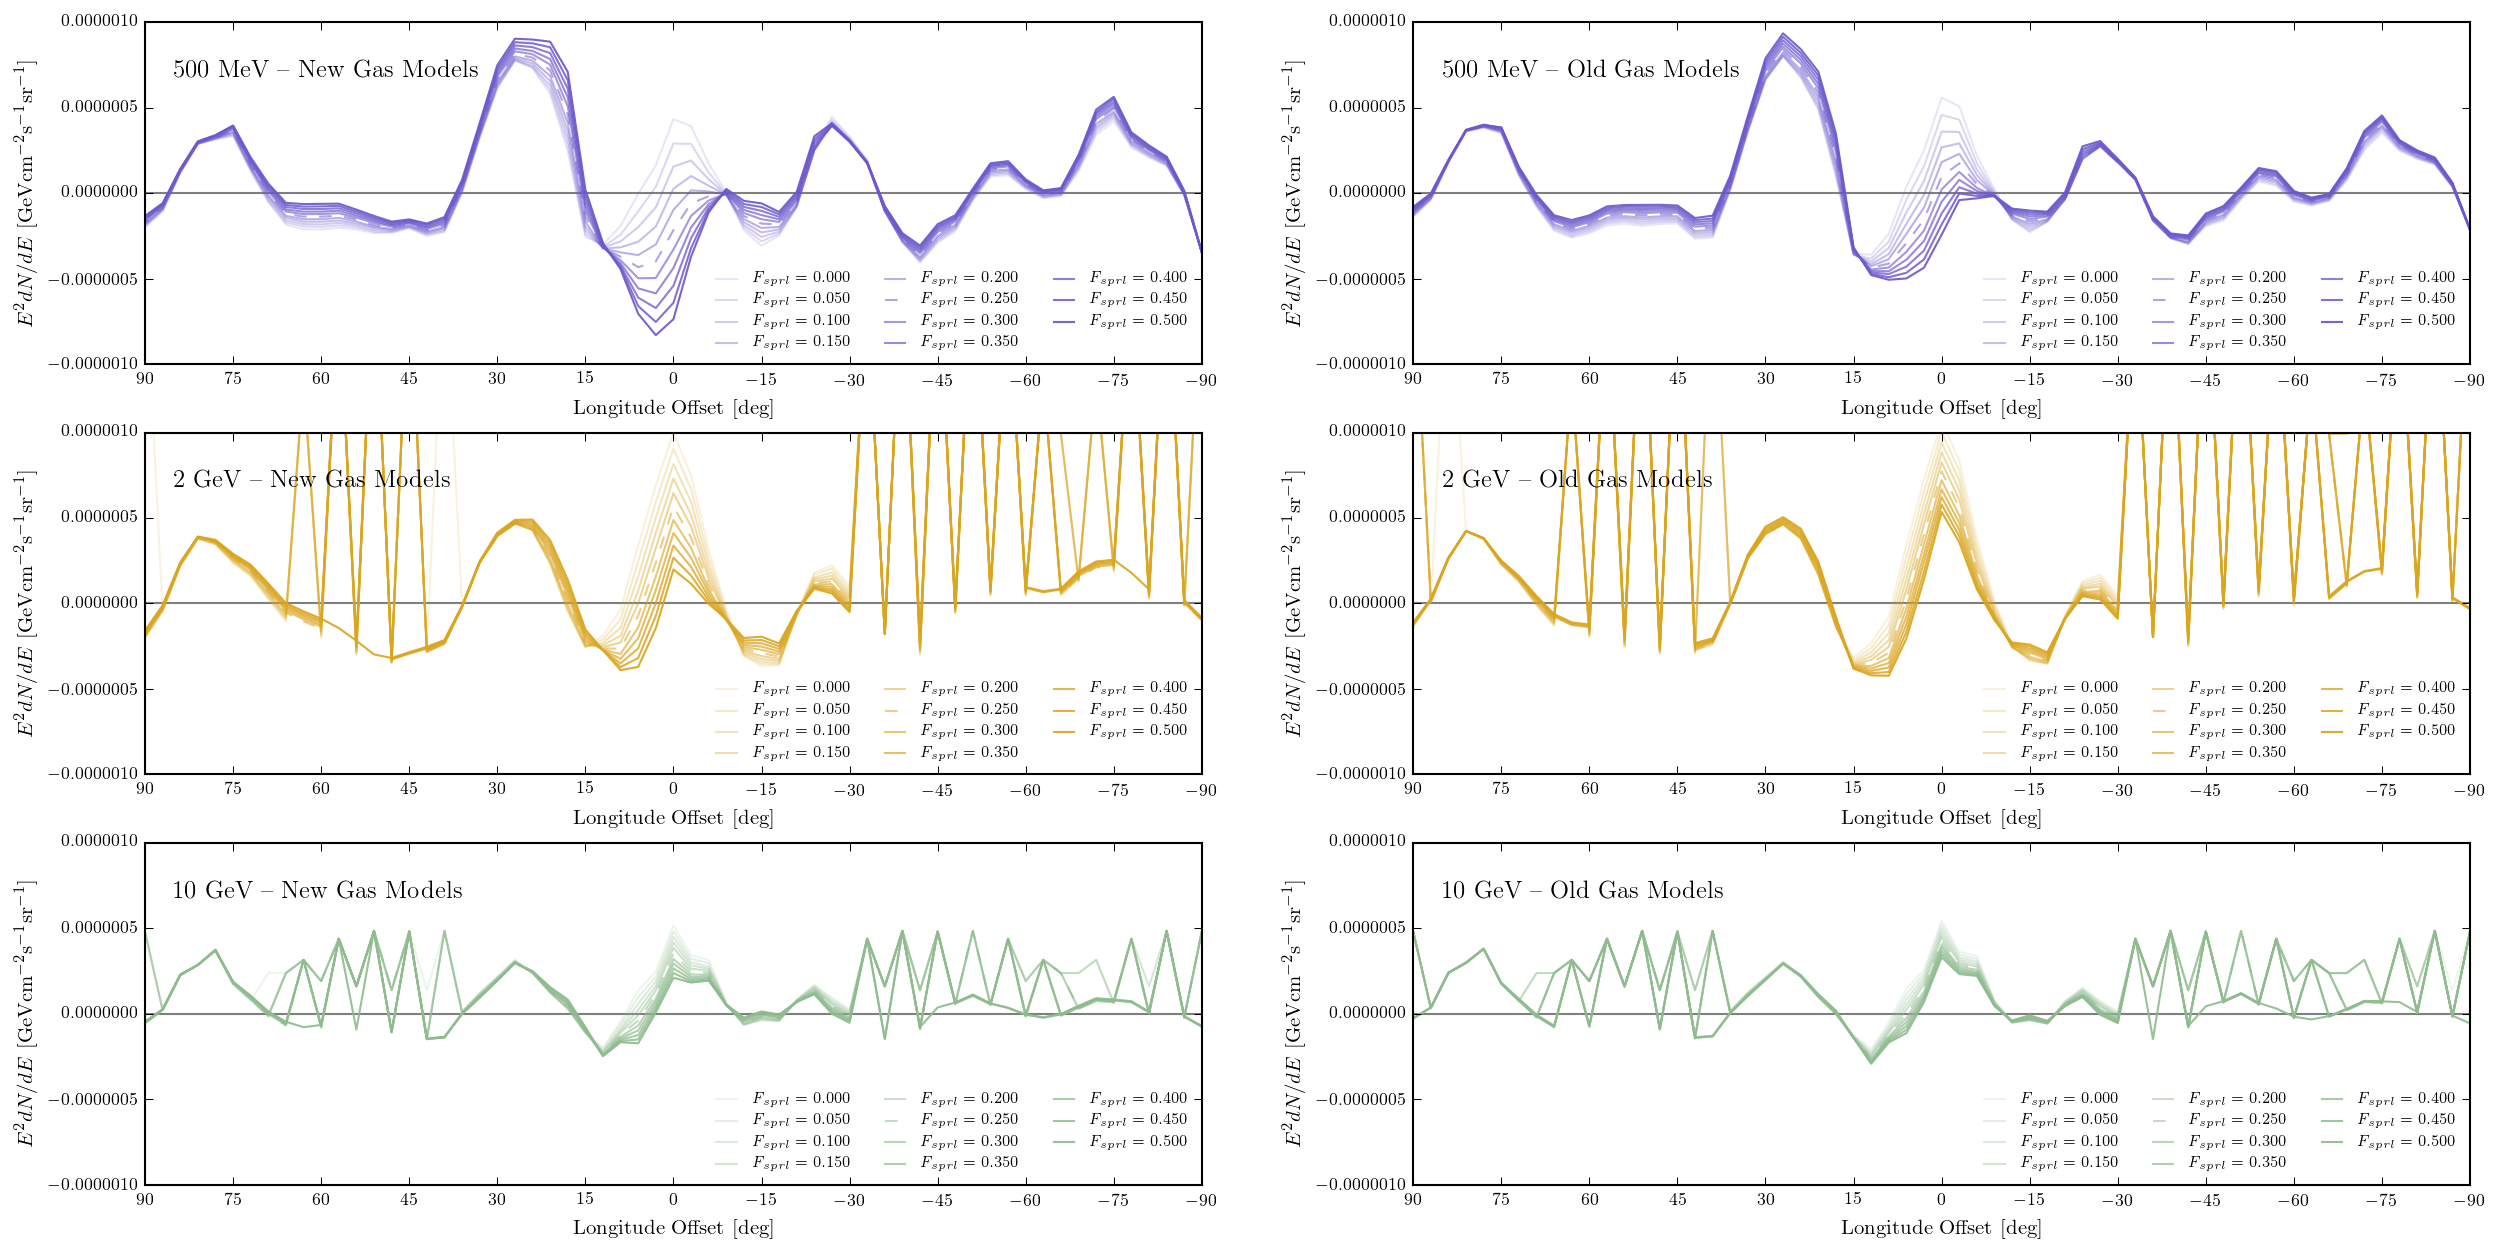

In [17]:
count = 0

plt.figure(figsize=(10,10))
# for i in range(1,10):
#     h5 = h5py.File('../mod_c/mod_f_'+str(i)+'_stripped.hdf5', 'r')
    
#     try:
#         #for f in h5['/fit_results/']: print f
#         energies =  h5['/fit_results/scan_longitude/'].attrs['energies']
#         dm_spec =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
#         lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']
        
#         flux500 = [energies[3]**2*spec[3]/1e3 for spec in dm_spec]
#         flux1000 = [energies[10]**2*spec[10]/1e3 for spec in dm_spec]
#         flux2000 = [energies[13]**2*spec[13]/1e3 for spec in dm_spec]
#         flux10000 = [energies[19]**2*spec[19]/1e3 for spec in dm_spec]


#         if i == best_fit:
#             #plt.plot(lons,flux500, c='darkseagreen', alpha=1, ls=':',label='0.5 GeV')
#             plt.plot(lons,flux2000, c='goldenrod', alpha=1, ls=':', label='2 GeV')
#             #plt.plot(lons,flux10000, c='slateblue', alpha=1, ls=':',label='10 GeV')
            
#         else:
#             #plt.plot(lons,flux500, c='darkseagreen', ls='-', alpha=.25)
#             plt.plot(lons,flux2000, c='goldenrod', alpha=(i+1)/11.)
#             #plt.plot(lons,flux10000, c='slateblue', alpha=.25, ls='-')
#     except:
#         pass



def PlotRange(start, stop, ebin, c, alpha=None,label=None, text=None):
    for i in range(start,stop):
        h5 = h5py.File('../mod_c/mod_k_'+str(i)+'_XCO_stripped.hdf5', 'r')

        try:
            #for f in h5['/fit_results/']: print f
            energies =  h5['/fit_results/scan_longitude/'].attrs['energies']
            dm_spec =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
            lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']

            flux = [energies[ebin]**2*spec[ebin]/1e3 for spec in dm_spec]
    #         flux1000 = [energies[10]**2*spec[10]/1e3 for spec in dm_spec]
    #         flux2000 = [energies[13]**2*spec[13]/1e3 for spec in dm_spec]
    #         flux10000 = [energies[19]**2*spec[19]/1e3 for spec in dm_spec]

            ls = '-'
            if alpha is not None:
                plt.plot(lons,flux, c=c, alpha=alpha, ls=ls, label=label)
            else: 
                
                if i in [5,48]:
                    ls = '--'
                plt.plot(lons,flux, c=c, alpha=(i-start+2)/(stop-start+2.), ls=ls, label=label[i-start])
                
        
        except:
            pass
    
    if text is not None:
        plt.text(85,6.75e-7, text)

    plt.legend(frameon=False, ncol=3, loc=4,fontsize=7)
    plt.ylabel(r'$E^2 dN/dE$ [$\rm GeV cm^{-2} s^{-1} sr^{-1}$]')
    plt.xlabel(r'Longitude Offset [deg]')
    plt.ylim(-10e-7, 1e-6)
    plt.hlines(0,-100,100, alpha=0.5)
    plt.gca().set_xticks(np.linspace(-90,90,13))
    plt.xlim(90, -90)
    
    
plt.figure(figsize=(20,10))
plt.subplot(321)
PlotRange(0,11, ebin=3, c='slateblue', alpha=None,label=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='500 MeV -- New Gas Models ')
plt.subplot(323)
PlotRange(0,11, ebin=13, c='goldenrod', alpha=None,label=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='2 GeV -- New Gas Models ')    
plt.subplot(325)
PlotRange(0,11, ebin=19, c='darkseagreen', alpha=None,label=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='10 GeV -- New Gas Models ')    
#plt.show()

#plt.figure(figsize=(20,10))
plt.subplot(322)
PlotRange(43,54, ebin=3, c='slateblue', alpha=None,label=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='500 MeV -- Old Gas Models ')
plt.subplot(324)
PlotRange(43,54, ebin=13, c='goldenrod', alpha=None,label=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='2 GeV -- Old Gas Models ')    
plt.subplot(326)
PlotRange(43,54, ebin=19, c='darkseagreen', alpha=None,label=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='10 GeV -- Old Gas Models ')    
    

plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/scan_lon_flux.pdf', bbox_inches='tight')

In [ ]:
import h5py

best_fit = 12

count = 0 
for i in range(0,65):
    
    h5 = h5py.File('../mod_b_'+str(i)+'.hdf5', 'r')
    energies =  h5['/fit_results/scan_longitude/'].attrs['energies']
    dm_spec =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
    lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']
    peak = [energies[np.argmax(spec)] for spec in dm_spec]

    if i == best_fit:
        plt.plot(lons,peak, c='k', alpha=1)

    else:
        plt.plot(lons,peak, c='y', alpha=.25)
            

plt.ylabel(r'Energy at Peak Flux [MeV]')
plt.xlabel(r'Longitude Offset [deg]')
plt.yscale('log')
print count
#plt.ylim(0,4e3)
#plt.xlim(1,1.5)

In [68]:
print energies[19]
print energies[3]

10105.3055384
474.341649025
